In [7]:
import sys
sys.path.append('../scripts')
import argparse
import os
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')

import lxml.etree
import nltk
import pandas as pd
from utils import is_punct

TOKENIZER = nltk.tokenize.word_tokenize

In [8]:
nlb = pd.read_csv('../data/nlb.csv', sep=',')
nlb.shape

(203249, 6)

In [9]:
nlb_timeset = nlb[(nlb['jaar_begin'] >= 1550) & (nlb['jaar_begin'] <= 1750)]
nlb_timeset.shape

(81571, 6)

In [14]:
topics = pd.read_csv('../gensim_output/VARD2_dominant_topic_per_song.csv', sep='\t', index_col=0)

In [15]:
top3topics = pd.read_csv('../gensim_output/top3topics.csv', sep='\t')
top3topics.head()

,id,top1,top2,top3
0,186989,topic 38,topic 18,topic 7
1,3644,topic 8,topic 10,topic 2
2,38949,topic 26,topic 24,topic 1
3,114233,topic 4,topic 48,topic 14
4,19987,topic 43,topic 19,topic 18


In [16]:
nlb_timeset.columns

Index(['recordid', 'incnormid', 'bronid', 'w_g', 'herdrukid', 'jaar_begin'], dtype='object')

In [17]:
nlb_timeset = nlb_timeset[nlb_timeset['incnormid'] != 0] 

In [18]:
topics.head()

,id,dominant_topic,perc_contribution
0,186989,38,0.318147
1,3644,8,0.633403
2,38949,26,0.774326
3,114233,4,0.463242
4,19987,43,0.978993


In [19]:
msc = nlb_timeset.merge(topics, left_on='recordid', right_on='id')

In [20]:
msc.shape

(35946, 9)

In [21]:
nlb_timeset = nlb_timeset.loc[nlb_timeset['incnormid'].isin(msc['incnormid'])]

In [22]:
nlb_timeset.shape

(43772, 6)

In [23]:
nlb_timeset = nlb_timeset.rename(columns = {'jaar_begin':'year'})

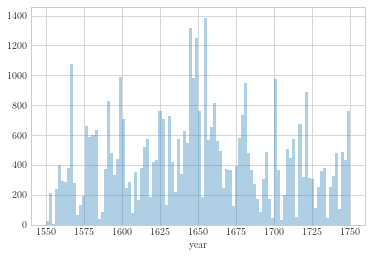

In [26]:
sns.set_palette('Blues_d', 1)
sns.distplot(nlb_timeset['year'], kde=False, bins=100)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('histyearall.jpg', dpi=300)

In [21]:
incs = msc.groupby('incnormid').first()[['dominant_topic', 'perc_contribution']]

In [22]:
incs.columns

Index(['dominant_topic', 'perc_contribution'], dtype='object')

In [23]:
topics = nlb_timeset.set_index('incnormid').join(incs).sort_values('incnormid')

In [24]:
topics = topics.reset_index()

In [25]:
topics.shape

(43772, 8)

In [26]:
topics.head(20)

,incnormid,recordid,bronid,w_g,herdrukid,year,dominant_topic,perc_contribution
0,4.0,118999,1001206,wereldlijk,NaN,1745.0,45,0.636000
1,7.0,111832,1001390,wereldlijk,NaN,1745.0,23,0.356607
2,7.0,136573,1001829,wereldlijk,NaN,1746.0,23,0.356607
3,13.0,19499,1000978,wereldlijk,NaN,1677.0,34,0.538515
4,53.0,20031,1001550,wereldlijk,928216.0,1654.0,43,0.964480
5,53.0,20031,1001025,wereldlijk,NaN,1655.0,43,0.964480
6,71.0,6245,1000738,wereldlijk,NaN,1659.0,43,0.980328
7,72.0,32562,1011033,wereldlijk,NaN,1667.0,29,0.296443
8,73.0,136601,1001829,wereldlijk,NaN,1746.0,29,0.338255
9,74.0,103064,1000696,wereldlijk,NaN,1656.0,29,0.489576


In [27]:
songstop = nlb_timeset.merge(top3topics, left_on='recordid', right_on='id')

In [28]:
songstop.shape

(35946, 10)

In [29]:
nlb_timeset = nlb_timeset.loc[nlb_timeset['incnormid'].isin(songstop['incnormid'])]

In [30]:
nlb_timeset.shape

(43772, 6)

In [31]:
nlb_timeset = nlb_timeset.rename(columns = {'jaar_begin':'year'})

In [32]:
incstop = songstop.groupby('incnormid').first()[['top1', 'top2', 'top3']]

In [33]:
incstop.columns

Index(['top1', 'top2', 'top3'], dtype='object')

In [34]:
top3topicsong = nlb_timeset.set_index('incnormid').join(incstop).sort_values('incnormid')

In [35]:
top3topicsong = top3topicsong.reset_index()

In [36]:
top3topicsong.shape

(43772, 9)

In [37]:
top3topicsong.to_csv('../gensim_output/top3topics_allsongs.csv', sep='\t')

In [1]:
import pandas as pd
top3topicsong = pd.read_csv('../gensim_output/top3topics_allsongs.csv', sep='\t', index_col=0)

In [2]:
bucolic = top3topicsong[(top3topicsong.top1 == 'topic 47') | (top3topicsong.top1 == 'topic 37') | (top3topicsong.top1 == 'topic 14')]

In [3]:
bucolic['top1'] = bucolic['top1'].replace('topic 47', 'bucolic songs (47)')
bucolic['top1'] = bucolic['top1'].replace('topic 14', 'myth and beauty (14)')
bucolic['top1'] = bucolic['top1'].replace('topic 37', 'nature (37)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

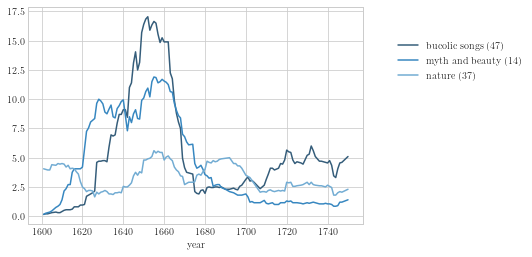

In [8]:
sns.set_palette('Blues_d', 3)
fig1 = pd.crosstab(bucolic.year, bucolic.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('bucolic.pdf', bbox_inches='tight')

In [3]:
nation = top3topicsong[(top3topicsong.top1 == 'topic 32') | (top3topicsong.top1 == 'topic 7') | (top3topicsong.top1 == 'topic 49')]

In [4]:
nation['top1'] = nation['top1'].replace('topic 32', 'nation and country (32)')
nation['top1'] = nation['top1'].replace('topic 7', 'God and enemy (7)')
nation['top1'] = nation['top1'].replace('topic 49', 'God and country (49)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

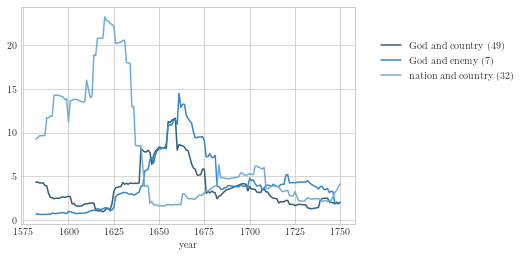

In [17]:
sns.set_palette('Blues_d', 3)
fig1 = pd.crosstab(nation.year, nation.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('nation.pdf', bbox_inches='tight')

In [9]:
money = top3topicsong[(top3topicsong.top1 == 'topic 27') | (top3topicsong.top1 == 'topic 26')] 

In [10]:
money['top1'] = money['top1'].replace('topic 27', 'world and money (27)')
money['top1'] = money['top1'].replace('topic 26', 'money and work (26)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


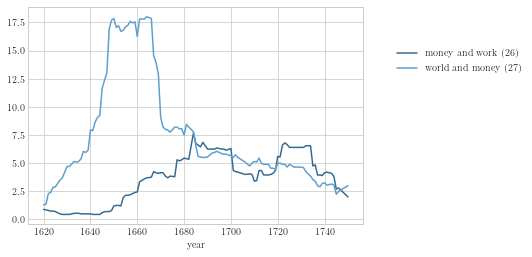

In [16]:
sns.set_palette('Blues_d', 2)
fig1 = pd.crosstab(money.year, money.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('money.pdf', bbox_inches='tight')

In [13]:
foreign = top3topicsong[(top3topicsong.top1 == 'topic 41') | (top3topicsong.top1 == 'topic 43')]

In [14]:
foreign['top1'] = foreign['top1'].replace('topic 41', 'German (41)')
foreign['top1'] = foreign['top1'].replace('topic 43', 'French (43)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


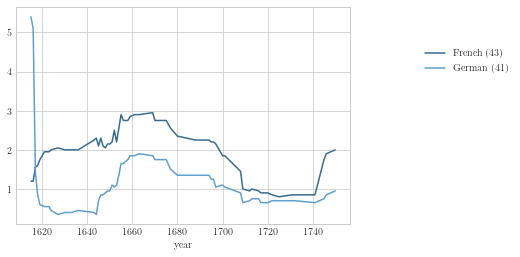

In [18]:
sns.set_palette('Blues_d', 2)
fig1 = pd.crosstab(foreign.year, foreign.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('foreign.pdf', bbox_inches='tight')

In [4]:
religion2 = top3topicsong[(top3topicsong.top1 == 'topic 1') | (top3topicsong.top1 == 'topic 44') | (top3topicsong.top1 == 'topic 40') | (top3topicsong.top1 == 'topic 4') | (top3topicsong.top1 == 'topic 42') | (top3topicsong.top1 == 'topic 15')]

In [5]:
religion2['top1'] = religion2['top1'].replace('topic 1', 'religion and Mary (1)')
religion2['top1'] = religion2['top1'].replace('topic 44', 'religion and virtue (44)')
religion2['top1'] = religion2['top1'].replace('topic 40', 'religion and Jesus (40)')
religion2['top1'] = religion2['top1'].replace('topic 4', 'religion and happiness (4)')
religion2['top1'] = religion2['top1'].replace('topic 42', 'cross and passion (42)')
religion2['top1'] = religion2['top1'].replace('topic 15', 'Old Testament (15)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [1]:
sns.set_palette('RdBu', 6)
fig1 = pd.crosstab(religion2.year, religion2.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
#plt.savefig('religion2.pdf', bbox_inches='tight')

NameError: name 'sns' is not defined

In [39]:
topic32 = top3topicsong.loc[top3topicsong['top1'] == 'topic 32']

In [111]:
topic1 = top3topicsong.loc[top3topicsong['top1'] == 'topic 1']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


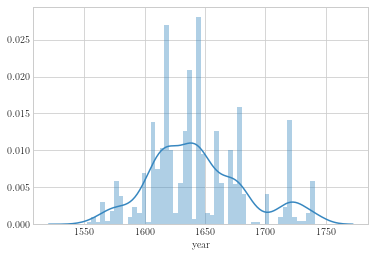

In [115]:
sns.set_palette('Blues_d', 1)
sns.distplot(topic1['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic1.pdf')

In [116]:
topic5 = top3topicsong.loc[top3topicsong['top1'] == 'topic 5']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


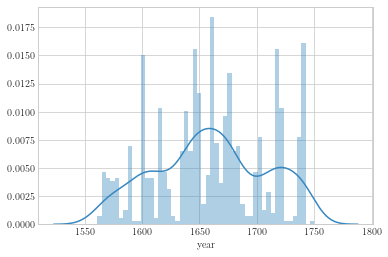

In [123]:
sns.distplot(topic5['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic5.pdf')

In [118]:
topic44 = top3topicsong.loc[top3topicsong['top1'] == 'topic 44']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


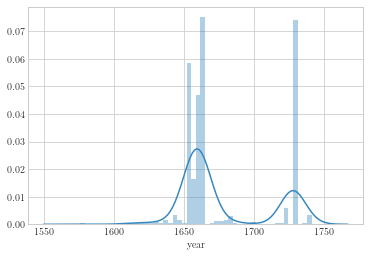

In [122]:
sns.distplot(topic44['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic44.pdf')

In [124]:
topic12 = top3topicsong.loc[top3topicsong['top1'] == 'topic 12']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


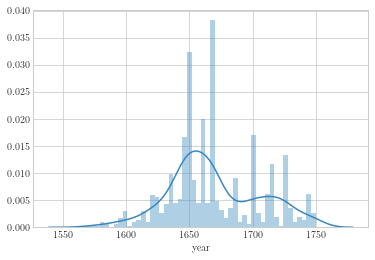

In [125]:
sns.distplot(topic12['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.savefig('topic32.pdf')

In [126]:
topic4 = top3topicsong.loc[top3topicsong['top1'] == 'topic 4']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


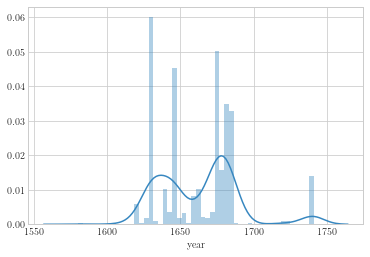

In [127]:
sns.distplot(topic4['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
#plt.savefig('topic32.pdf')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


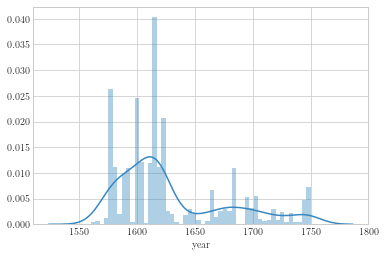

In [54]:
sns.distplot(topic32['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic32.pdf')

In [41]:
topic9 = top3topicsong.loc[top3topicsong['top1'] == 'topic 9']

In [42]:
love = top3topicsong[(top3topicsong.top1 == 'topic 38') | (top3topicsong.top1 == 'topic 39')]

In [14]:
love_extended = top3topicsong[(top3topicsong.top1 == 'topic 38') | (top3topicsong.top1 == 'topic 39') | (top3topicsong.top1 == 'topic 2') | (top3topicsong.top1 == 'topic 24') | (top3topicsong.top1 == 'topic 34') | (top3topicsong.top1 == 'topic 21') | (top3topicsong.top1 == 'topic 23')]

In [15]:
love_extended['top1'] = love_extended['top1'].replace('topic 38', 'love and happiness (38)')
love_extended['top1'] = love_extended['top1'].replace('topic 39', 'love and sadness (39)')
love_extended['top1'] = love_extended['top1'].replace('topic 2', 'love and tragedy (2)')
love_extended['top1'] = love_extended['top1'].replace('topic 24', 'rejection (24)')
love_extended['top1'] = love_extended['top1'].replace('topic 34', 'seducing (34)')
love_extended['top1'] = love_extended['top1'].replace('topic 21', 'love and happiness (21)')
love_extended['top1'] = love_extended['top1'].replace('topic 23', 'physical love (23)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

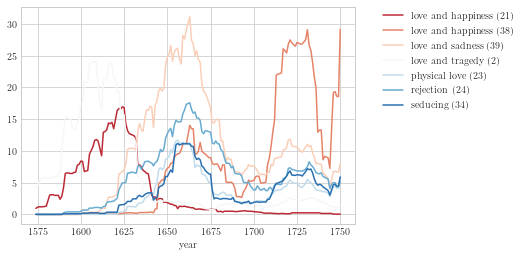

In [17]:
sns.set_palette('RdBu', 7)
fig1 = pd.crosstab(love_extended.year, love_extended.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('love_extended.pdf', bbox_inches='tight')

In [43]:
love.columns

Index(['incnormid', 'recordid', 'bronid', 'w_g', 'herdrukid', 'year', 'top1',
       'top2', 'top3'],
      dtype='object')

In [92]:
love['top1'] = love['top1'].replace('topic 38', 'love and happiness (38)')
love['top1'] = love['top1'].replace('topic 39', 'love and sadness (39)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


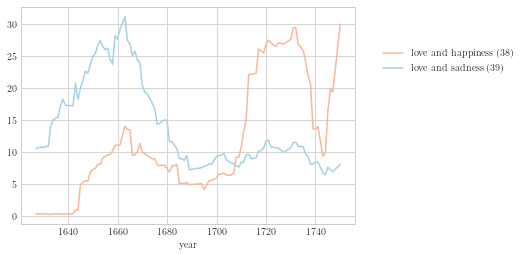

In [109]:
sns.set_palette('RdBu', 2)
fig1 = pd.crosstab(love.year, love.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
#plt.savefig('love.pdf', bbox_inches='tight')

In [69]:
religion_min_9 = top3topicsong[(top3topicsong.top1 == 'topic 31') | (top3topicsong.top1 == 'topic 0') | (top3topicsong.top1 == 'topic 28') | (top3topicsong.top1 == 'topic 18') | (top3topicsong.top1 == 'topic 13')]

In [83]:
religion = top3topicsong[(top3topicsong.top1 == 'topic 9') | (top3topicsong.top1 == 'topic 31') | (top3topicsong.top1 == 'topic 0') | (top3topicsong.top1 == 'topic 28') | (top3topicsong.top1 == 'topic 18') | (top3topicsong.top1 == 'topic 13')]

In [84]:
religion['top1'] = religion['top1'].replace('topic 9', 'religion and old spelling (9)')
religion['top1'] = religion['top1'].replace('topic 0', 'religion and life (0)')
religion['top1'] = religion['top1'].replace('topic 13', 'religion (13)')
religion['top1'] = religion['top1'].replace('topic 18', 'religion (18)')
religion['top1'] = religion['top1'].replace('topic 28', 'intangible religion (28)')
religion['top1'] = religion['top1'].replace('topic 31', 'religion (31)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [79]:
religion.head(20)

,incnormid,recordid,bronid,w_g,herdrukid,year,top1,top2,top3
24,141.0,116406,1001338,geestelijk,920504.0,1692.0,intangible religion (28),topic 18,topic 16
25,141.0,118227,1001323,geestelijk,NaN,1732.0,intangible religion (28),topic 18,topic 16
26,141.0,147332,1001304,geestelijk,910281.0,1736.0,intangible religion (28),topic 18,topic 16
27,141.0,148207,1001307,geestelijk,NaN,1700.0,intangible religion (28),topic 18,topic 16
28,141.0,116406,1016154,geestelijk,NaN,1681.0,intangible religion (28),topic 18,topic 16
29,141.0,147332,1000977,geestelijk,NaN,1732.0,intangible religion (28),topic 18,topic 16
32,143.0,34059,1011050,geestelijk,NaN,1660.0,religion & life (0),topic 4,topic 1
42,174.0,20440,1002001,geestelijk,910477.0,1694.0,religion (18),topic 27,topic 19
43,174.0,20440,1001035,geestelijk,921636.0,1655.0,religion (18),topic 27,topic 19
44,174.0,20440,1010227,geestelijk,929506.0,1700.0,religion (18),topic 27,topic 19


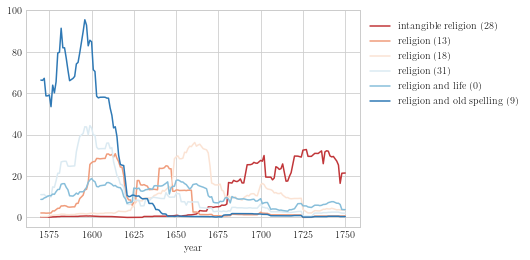

In [107]:
sns.set_palette('RdBu', 6)
fig3 = pd.crosstab(religion.year, religion.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('religion.pdf', bbox_inches='tight')

In [89]:
religion_min_9['top1'] = religion_min_9['top1'].replace('topic 0', 'religion and life (0)')
religion_min_9['top1'] = religion_min_9['top1'].replace('topic 13', 'religion (13)')
religion_min_9['top1'] = religion_min_9['top1'].replace('topic 18', 'religion (18)')
religion_min_9['top1'] = religion_min_9['top1'].replace('topic 28', 'intangible religion (28)')
religion_min_9['top1'] = religion_min_9['top1'].replace('topic 31', 'religion (31)')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/alielassche/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

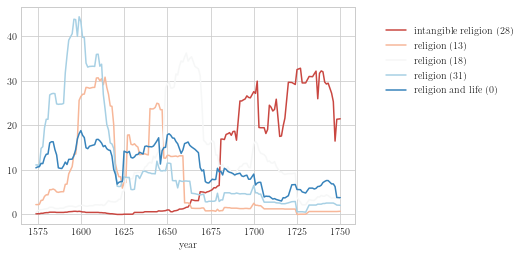

In [108]:
sns.set_palette('RdBu', 5)
fig2 = pd.crosstab(religion_min_9.year, religion_min_9.top1).rolling(window=20).mean().plot()
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.legend(loc='right', bbox_to_anchor=(1.5, 0.75),
          ncol=1, fancybox=False, shadow=False)
plt.savefig('religion_min_9.pdf', bbox_inches='tight')

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


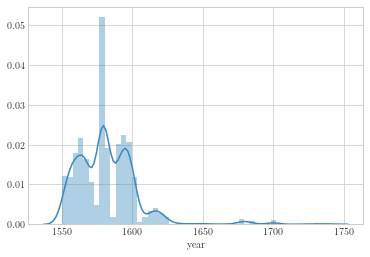

In [57]:
sns.set_palette('Blues_d', 1)
sns.distplot(topic9['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic9.pdf')

In [49]:
topic24 = top3topicsong.loc[top3topicsong['top1'] == 'topic 24']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


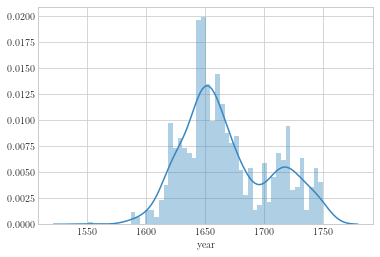

In [58]:
sns.set_palette('Blues_d', 1)
sns.distplot(topic24['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic24.pdf')

In [51]:
topic12 = top3topicsong.loc[top3topicsong['top1'] == 'topic 12']

/Users/alielassche/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


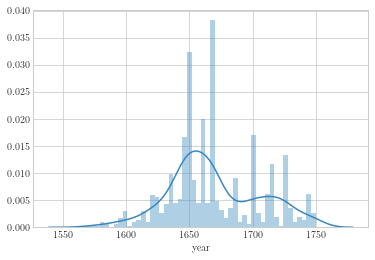

In [59]:
sns.set_palette('Blues_d', 1)
sns.distplot(topic12['year'], bins=50)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.savefig('topic12.pdf')

In [48]:
topics.to_csv('topics_incnormid.csv', sep='\t')

In [18]:
print(topics['recordid'].nunique())
print(topics['incnormid'].nunique())
print(topics['herdrukid'].nunique())

27502
18914
16367


In [19]:
topics.groupby('dominant_topic')['dominant_topic'].count().sort_values(ascending=False).to_latex()

'\\begin{tabular}{lr}\n\\toprule\n{} &  dominant\\_topic \\\\\ndominant\\_topic &                 \\\\\n\\midrule\n9              &            3936 \\\\\n31             &            1966 \\\\\n0              &            1848 \\\\\n28             &            1700 \\\\\n39             &            1671 \\\\\n18             &            1631 \\\\\n38             &            1607 \\\\\n13             &            1403 \\\\\n6              &            1277 \\\\\n32             &            1221 \\\\\n2              &            1073 \\\\\n24             &            1062 \\\\\n30             &            1038 \\\\\n1              &            1029 \\\\\n5              &            1021 \\\\\n44             &             944 \\\\\n27             &             869 \\\\\n12             &             841 \\\\\n47             &             787 \\\\\n40             &             771 \\\\\n48             &             767 \\\\\n8              &             755 \\\\\n46             &           

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('VARD2_topics.csv', sep='\t', index_col=0)

In [5]:
col_list= list(df)
col_list.remove('id')
col_list

['topic 0',
 'topic 1',
 'topic 2',
 'topic 3',
 'topic 4',
 'topic 5',
 'topic 6',
 'topic 7',
 'topic 8',
 'topic 9',
 'topic 10',
 'topic 11',
 'topic 12',
 'topic 13',
 'topic 14',
 'topic 15',
 'topic 16',
 'topic 17',
 'topic 18',
 'topic 19',
 'topic 20',
 'topic 21',
 'topic 22',
 'topic 23',
 'topic 24',
 'topic 25',
 'topic 26',
 'topic 27',
 'topic 28',
 'topic 29',
 'topic 30',
 'topic 31',
 'topic 32',
 'topic 33',
 'topic 34',
 'topic 35',
 'topic 36',
 'topic 37',
 'topic 38',
 'topic 39',
 'topic 40',
 'topic 41',
 'topic 42',
 'topic 43',
 'topic 44',
 'topic 45',
 'topic 46',
 'topic 47',
 'topic 48',
 'topic 49']

In [6]:
df['sum'] = df[col_list].sum(axis=1)

In [7]:
df.head()

,id,topic 0,topic 1,topic 2,topic 3,topic 4,topic 5,topic 6,topic 7,topic 8,...,topic 41,topic 42,topic 43,topic 44,topic 45,topic 46,topic 47,topic 48,topic 49,sum
0,186989,0.001133,0.000460,0.000571,0.001334,0.000532,0.000356,0.000333,0.167554,0.000240,...,0.000077,0.000629,0.000034,0.000330,0.000058,0.000728,0.000524,0.015967,0.000897,1.0
1,3644,0.000609,0.000247,0.081496,0.041311,0.000286,0.000191,0.000179,0.000706,0.633403,...,0.000041,0.000338,0.000018,0.000177,0.000031,0.008510,0.000282,0.000459,0.000482,1.0
2,38949,0.000580,0.038945,0.000292,0.008425,0.000272,0.000183,0.000170,0.000673,0.000123,...,0.000039,0.000322,0.000017,0.000169,0.000030,0.000373,0.000268,0.000438,0.000459,1.0
3,114233,0.091450,0.000276,0.000343,0.000801,0.463242,0.000214,0.000200,0.000789,0.000144,...,0.000046,0.000378,0.000020,0.000198,0.000035,0.000437,0.000315,0.254667,0.009615,1.0
4,19987,0.000727,0.000295,0.000366,0.000856,0.000341,0.000229,0.000213,0.000843,0.000154,...,0.000049,0.000403,0.978993,0.000212,0.000037,0.000467,0.000336,0.000548,0.000575,1.0
